<a href="https://colab.research.google.com/github/solobala/STPY36/blob/main/STPY36_DZ6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание "Доверительные интервалы"

## Импорт библиотек

In [ ]:
import numpy as np 
from numpy.random import seed
import pandas as pd  # для работы с таблицами
import scipy as sp
from scipy import stats as st # При работе со статистикой
from scipy.stats import shapiro
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 


## Задание № 0
Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

желаемая точность  Δ  = 3;
дисперсия  𝜎2  = 225;
уровень доверия  𝛽  = 0.95.

Ответ округлите до целого

In [ ]:
delta = 3
var = 225
beta = 0.95
alfa = 1-beta
sigma = np.sqrt(var)
z = 1.96 # находим по таблице квантилей нормального распределения по известным sigma и beta
n = int(np.ceil(((sigma*z)/delta)**2))
print(f'Минимально необходимый объем выборки: {n}')

Минимально необходимый объем выборки: 97


##Задание № 1

Постройте 98% доверительный интервал для среднего значения, если известно, что

объем выборки n = 25;
среднее значение по выборке  𝑥⎯⎯⎯  = 130;
Из достоверных источников известно стандартное отклонение  𝜎=15 .

В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), округленную до целого

In [ ]:
n = 25 # объем выборки <30 -считаем по Стьюденту
loc = 130
sigma = 15
alfa = 0.98
ci_lower, ci_upper = st.norm.interval(alpha=alfa, loc=loc, scale=sigma)
print(f'Мы уверены на {alfa*100}%, что истинное среднее значение генеральной совокупности находится в диапазоне между {ci_lower:5.3f} и {ci_upper:5.3f}')
L = int((ci_upper - ci_lower)) 
print('L = ', L)

Мы уверены на 98.0%, что истинное среднее значение генеральной совокупности находится в диапазоне между 95.105 и 164.895
L =  69


## Задание № 2
Даны две выборки роста мужчин и женщин.

Докажите, используя t-Тест Стьюдента, что различие между выборками незначительно, если уровень значимости равен  𝛼  = 0.001.
Покажите различия визуально

In [ ]:
#H0: Средние обоих выборок равны.
mens  =st.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens =st.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

k=0

for i in range(1000):
    mens  = st.norm.rvs(loc=171, scale=10, size=1500)  # Выборка мужчин со средним ростом 171
    womens = st.norm.rvs(loc=170, scale=10, size=1500)  # Выборка женщин со средним ростом 170
    t, p = st.ttest_ind(mens,womens)
    if p < 0.001:
        k+=1
print(k)

278


Число экспериментов, в которых  различие между выборками значительно, существенно меньше, чем число экспериментов с незначительным различием средних ( примерно треть от общего числа экспериментов). Делаем вывод, что различие в выборках незначительно.

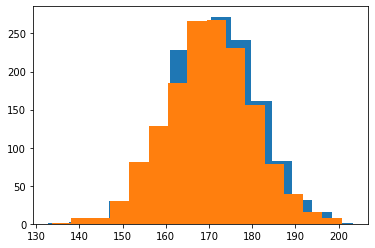

In [ ]:
plt.hist(mens, bins=15);
plt.hist(womens, bins=15);

## Задание № 3
Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

стандартное отклонение  𝜎=150 ;
уровень доверия  𝛽  = 95%;
Погрешность  Δ=50  рублей.

In [ ]:
sigma = 150
beta = 95
delta = 50
alfa = 1-beta
Z = 1.96 # находим по таблице квантиль нормального распределения для двусторонней выборки для beta= 95
n = int(np.ceil(((sigma*z)/delta)**2))
print(f'Объем необходимой выборки n = {n}')

Объем необходимой выборки n = 35


## Задание № 4
Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за 0.05 ( 𝛼=0.05 ).

In [ ]:
#H0: правильные ответы случайны. Нет никакой разницы в выборках равильных и неправильных ответов
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [ ]:
oddsratio, pvalue = st.fisher_exact(observations) # Используем непараметрический тест Фишера
print('Статистика=%.3f, p=%.3f' % (oddsratio, pvalue))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, выборки, вероятно, независимы, и маг не умеет предсказывать погоду')
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, зависимы, и  маг умеет предсказывать погоду')

Статистика=0.581, p=0.354
Не отклоняем нулевую гипотезу, выборки, вероятно, независимы, и маг не умеет предсказывать погоду


## Задание № 5
Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия  𝛽=90%  для выборки:

In [ ]:
def mean_confidence_interval(data, confidence=beta): # confidence - Уровень доверия
    n = len(data) # размер выборки
    m, se = np.mean(data), st.sem(data) # среднее значение и sem - ошибка оценки среднего - вместо поиска сигмы
    h = se * st.t.ppf((1 + confidence)/2, n-1)  #  функция t.ppf из scipy sst возвращает нам перцентиль
    return m-h, m, m+h 

In [ ]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

beta = 0.90
result = mean_confidence_interval(data, beta)
print(f'Доверительный интервал для выборки data с уровнем доверия {beta * 100}% и средним значением {result[1]} находится в пределах от {result[0]} до {result[2]}')

Доверительный интервал для выборки data с уровнем доверия 90.0% и средним значением 6.628571428571429 находится в пределах от 6.07363110319857 до 7.183511753944288


## Задание № 6
Принадлежат ли выборки A и B одному множеству?

Оцените это с помощью известных вам тестов для проверок статистических гипотез;
Покажите различия визуально.

In [ ]:
def shapiro_test(names,datas):
    """
    Служебная функция для вывода информации o нормальности распределений А и B 
    по тесту Шапиро-Уилкса c уровнем значимости 0.05.
    на входе - список выборок
    """
    seed(1)
    for data in datas:
        stat, p = shapiro(data)
        print(names[datas.index(data)])
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        alpha = 0.05
        if p > alpha:
            print('Предположительно нормальное распределение (Недостаточно данных, чтобы отвергнуть H0)')
        else:
            print('Отвергаем H0 о нормальности распределения')
        print()

In [ ]:
def get_stat(names,datas):
  """
  Функция для расчета и печати основных статистик.
  на входе - списки названий выборок и выборок
  на выходе- размер,среднее значение, дисперсия каждой из выборок, а также
  предположение о равенстве дисперсий
  """
  count_, mean_, var_ =[],[],[]
  for data in datas:
    count_.append(len(data))
    mean_.append(np.mean(data))
    var_ .append(np.var(data))
    print(f'{names[datas.index(data)]}:')
    print(f'count = {count_[datas.index(data)]}, mean = {mean_[datas.index(data)]},  var = {var_[datas.index(data)]}')
    print('-------------------------------------------------------------------------------------------------------------------------------------------------------------------')
  return count_,mean_,var_

In [ ]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]  

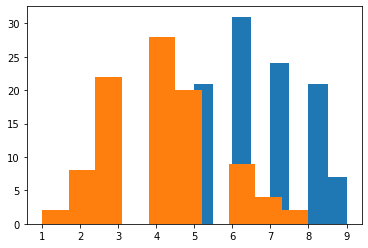

In [ ]:
plt.hist(A);
plt.hist(B);

Визуально обе выборки не непрерывны (дискретны), не совпадают полностью и имеют распределение, отличное от  нормального. Определим средние и дисперсии: 

In [ ]:
count_,mean_, var_ = get_stat(['A', 'B'], [A, B])

A:
count = 112, mean = 6.446428571428571,  var = 1.8007015306122451
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
B:
count = 95, mean = 4.147368421052631,  var = 2.041440443213297
-------------------------------------------------------------------------------------------------------------------------------------------------------------------


Полученные значения среднего и дисперсии в абсолютном выражении различны у обеих выборок. Оценим значимость различий с помощью теста Стьюдента для независимых выборок

In [ ]:
stat, p = st.ttest_ind(A, B, equal_var = False)

print('Статистика=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=11.80325, p=0.00000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


Тест Стьюдента мог быть и некорректен, т.е рапределение визуально отличается от нормального.

In [ ]:
# Проверим, принадлежат ли A  и B к генеральной совокупности с нормальным распределением
#H0: A и B принадлежат генеральной совокупности с нормальным распределением, т.е имеют ноормальное распределение
shapiro_test(['A', 'B'],[A, B]) 

A
Statistics=0.936, p=0.000
Отвергаем H0 о нормальности распределения

B
Statistics=0.949, p=0.001
Отвергаем H0 о нормальности распределения



Распределения не принадлежат генеральной совокупности с нормальным распределением и при этом дискретны. Параметрические тесты использовать нельзя. Используем Тест Манна-Уитни для проверки гипотезы об одинаковости распределений A и B

In [ ]:
#H0: Распределения одинаковы
stat, p = st.mannwhitneyu(A, B)

print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика=9280.500, p=0.000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


In [ ]:
# Cредние и дисперсии A и B по абсолютной величине  различны. Проверим значимость различий с использованием точного теста Фишера
#H0: Выборки одинаковы, разница в средних и дисперсиях незначимы
x =[[mean_[0], mean_[1]],[var_[0], var_[1]]]
oddsratio, p = st.fisher_exact(x) 
print('Статистика=%.3f, p=%.3f' % (oddsratio, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, выборки, вероятно, независимы')
else:
    print('Отклоняем нулевую гипотезу, вероятно, есть некоторая зависимость')

Статистика=3.000, p=0.559
Не отклоняем нулевую гипотезу, выборки, вероятно, независимы


In [ ]:
#Т.е мы выяснили, что выборки, вероятно, независимы и различны между собой

## Задание № 7 (задание без подвоха)
На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

Предположим, Вы сформировали две гипотезы:
нулевая гипотеза - распределение нормальное;
альтернативная гипотеза - распределение ненормальное.
допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости p-value = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)

In [ ]:
# Ответ: Нет, распределение не является нормальным, т.к. полученное p-Value <0.05

## Задание № 8
Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом B.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

Требуется выяснить, имеется ли значимое различие эффективности препаратов А и B, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики? (уровень значимости принять за 0.05 (5%))

При каком минимальном p-value различия были бы уже значимы?

Если выборки незначительно отличаются, то продемонстрируйте это визуально

In [ ]:
np.random.seed(11)
A = st.norm.rvs(scale=15, loc=169, size=300)
B = st.norm.rvs(scale=14, loc=171.4, size=300)

# Т.к мы изначально генерировали обе выборки как имеющие нормальное распределение, то к ним можно применить параметрический 
# Парный тест Стьюдента, который сравнивает средние значения при связанных данных, когда измерения проводились, например, 
#до и после каких-то изменений.
# H0: средние значения A и B равны
stat, p = st.ttest_rel(a=A, b=B)

print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=-2.035, p=0.043
Отклоняем нулевую гипотезу, средние, вероятно, различаются


При 5% уровне значимости мы получили данные о том, что средние выборок A и B различаются значимо. Этот вывод можно было сделать в том случае, 
если бы расчетное значение p-value не превышало 0.05.
Несмотря на небольшую величину p-value, визуально различия практически не заметны

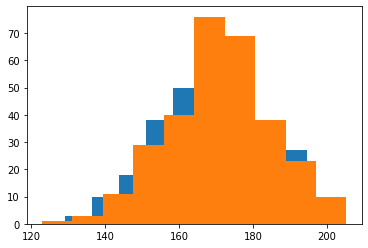

In [ ]:
plt.hist(A);
plt.hist(B);